In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
hero_network = pd.read_csv("./hero-network.csv")

Познакомимся с данными

In [5]:
hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [6]:
hero_network.shape

(574467, 2)

Уберем дубликаты 

In [7]:
hero_network_dd = hero_network.drop_duplicates()

In [8]:
hero_network_dd.shape

(224181, 2)

Количество героев (будущих вершин в графе) 

In [9]:
len(set(hero_network_dd['hero2'].unique().tolist()) | set(hero_network_dd['hero1'].unique().tolist()))

6426

Возьмкм только часть данных, чтобы лучше познакомиться с интерфейсом networkx

In [10]:
net = nx.Graph()

In [11]:
for line in hero_network_dd.iterrows():
    net.add_edge(*line[1].values)

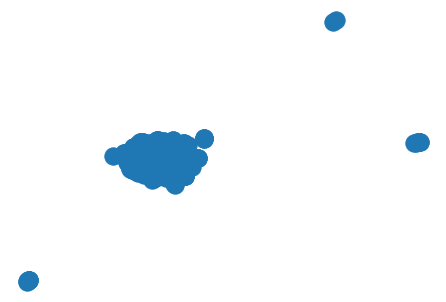

In [12]:
nx.draw(net)

In [11]:
print("Number of nodes: {}".format(len(net.nodes())))

Number of nodes: 6426


In [12]:
print("Number of edges: {}".format(len(net.edges())))

Number of edges: 167219


In [13]:
print("Average degree of nodes: {0:.2f}".format(len(net.edges())/len(net.nodes())))

Average degree of nodes: 26.02


In [14]:
print("Connected graph - {}".format(nx.is_connected(net)))

Connected graph - False


In [15]:
largest_cc = max(nx.connected_components(net), key=len)

In [16]:
small_net = net.subgraph(max(nx.connected_components(net), key=len))

In [17]:
print("Number of nodes: {}".format(len(small_net.nodes())))
print("Number of edges: {}".format(len(small_net.edges())))
print("Average degree of nodes: {0:.2f}".format(len(net.edges())/len(net.nodes())))

Number of nodes: 6408
Number of edges: 167163
Average degree of nodes: 26.02


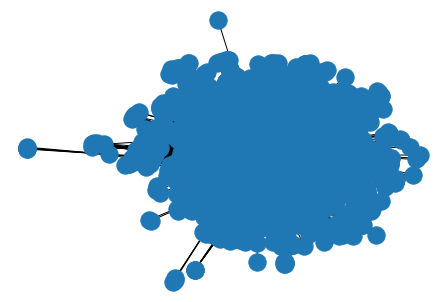

In [18]:
nx.draw(small_net)

In [19]:
print("Density : {0:.3f}".format(nx.density(small_net)))

Density : 0.008


In [20]:
degree_view = nx.degree(small_net)

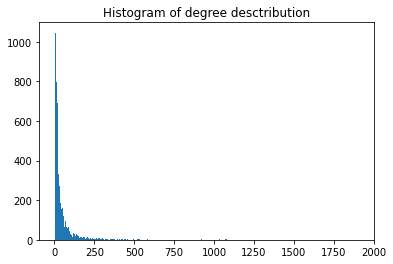

In [21]:
degree_values = dict(degree_view).values()
plt.hist([i for i in list(degree_values)], bins = len(set(degree_values)))
plt.title("Histogram of degree desctribution")
plt.show()

In [22]:
from collections import Counter
res = Counter(list(dict(degree_view).values()))

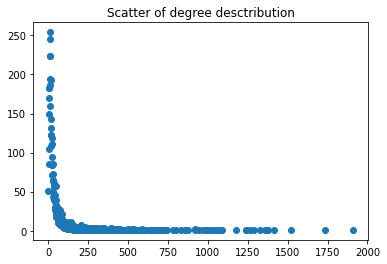

In [23]:
plt.title("Scatter of degree desctribution")
plt.scatter(res.keys(), res.values())
plt.show()

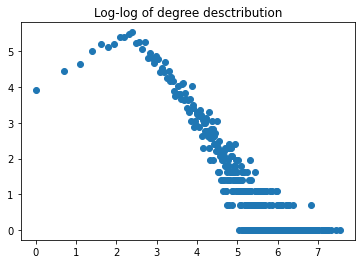

In [25]:
import math
plt.title("Log-log of degree desctribution")
plt.scatter([math.log(i) for i in res.keys()], [math.log(i) for i in res.values()])
plt.show()

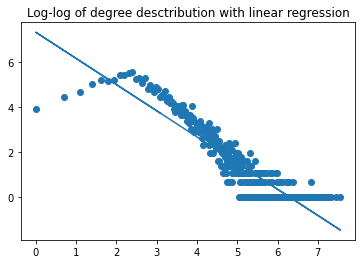

In [30]:
import numpy as np
x = np.array([math.log(i) for i in res.keys()])
y = np.array([math.log(i) for i in res.values()])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.title("Log-log of degree desctribution with linear regression")
plt.show()